# EDA COVID-19 DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the data
df = pd.read_csv('../Di/data/Pol5.csv')[:1500]

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Cleaning

In [3]:
df.head()

,time,id,text,user,uid,hashtag,symbol,mention_username,mention_id,mention_realname,...,rtusername,quote_count,reply_count,retweet_count,favorite_count,lang,rtb,rtcheck,mentioncheck,replycheck
0,2020-05-14 20:20:03+00:00,1261028523772391424,Too many families were already struggling to n...,MurrayCampaign,158470209,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False
1,2020-05-14 20:20:03+00:00,1261028524795838466,@realDonaldTrump @trish_regan China sent the v...,MariKay77,727153519,NaN,NaN,realDonaldTrump trish_regan,25073877 138182116,Donald J. Trump Trish Regan,...,NaN,0,0,0,0,en,True,False,True,True
2,2020-05-14 20:20:04+00:00,1261028526020538375,@eileeniorio @LotusOak2 @POTUS You are very na...,GlendaMcRose,1370806812,NaN,NaN,eileeniorio LotusOak2 POTUS,2932344645 424664120 822215679726100480,EileenIorio LotusOak President Trump,...,NaN,0,0,0,0,en,True,False,True,False
3,2020-05-14 20:20:04+00:00,1261028529451479048,@lien2marsha @OttoPardey @RepFredKeller @White...,jazbec_mike,965060983646572544,NaN,NaN,lien2marsha OttoPardey RepFredKeller WhiteHous...,3882819740 1260226019287601153 113606076142240...,Marsha Lien Otto Pardey Congressman Fred Kelle...,...,NaN,0,0,0,0,en,True,False,True,False
4,2020-05-14 20:20:06+00:00,1261028537995276294,@ProfFionasm @ChrisMurphyCT last leg delivery ...,thatotherGH,190373454,NaN,NaN,ProfFionasm ChrisMurphyCT,913093166638731264 150078976,Fiona Scott Morton Chris Murphy,...,NaN,0,0,0,0,en,True,False,True,False


In [4]:
#First I want to get a sense of the missing data
null_vals = 100 * df.isnull().sum() / len(df) #Here I express the number of null values for each column as a percentage of the total rows
print(null_vals)

time                           0.000000
id                             0.000000
text                           0.000000
user                           0.000000
uid                            0.000000
hashtag                       86.266667
symbol                       100.000000
mention_username               2.200000
mention_id                     2.200000
mention_realname               2.200000
url                           24.266667
expanded_url                  24.266667
source                         0.000000
in_reply_to_id                18.133333
in_reply_to_uid               12.000000
in_reply_to_username          12.000000
user_loc                      40.266667
user_created_at                0.000000
user_follower_count            0.000000
user_favorite_count            0.000000
user_friends_count             0.000000
user_status_count              0.000000
user_listed_count              0.000000
user_description              23.733333
user_url                      84.066667


In [5]:
# I am going to go ahead and drop any column that is over 90% null as they are not going to add any value to the dataset
df = df.drop(null_vals[null_vals >= 75].index, axis=1)

In [6]:
#Okay let's look at this again
null_vals = 100 * df.isnull().sum() / len(df) 
print(null_vals)

time                          0.000000
id                            0.000000
text                          0.000000
user                          0.000000
uid                           0.000000
mention_username              2.200000
mention_id                    2.200000
mention_realname              2.200000
url                          24.266667
expanded_url                 24.266667
source                        0.000000
in_reply_to_id               18.133333
in_reply_to_uid              12.000000
in_reply_to_username         12.000000
user_loc                     40.266667
user_created_at               0.000000
user_follower_count           0.000000
user_favorite_count           0.000000
user_friends_count            0.000000
user_status_count             0.000000
user_listed_count             0.000000
user_description             23.733333
user_protected                0.000000
user_geo_enabled              0.000000
user_contributors_enabled     0.000000
user_is_translator       

In [7]:
#Next, I would like to make sure the dates are in date time format
df.dtypes[:5]

time    object
id       int64
text    object
user    object
uid      int64
dtype: object

In [8]:
df['time'] = df['time'].apply(lambda timestamp : pd.to_datetime(timestamp))

In [9]:
#Lets take a look at the retweet column
df.retweet.unique()

array([False])

In [10]:
#It looks like this category is useless as retweets have already been filtered out so dropping this
df = df.drop('retweet',axis=1)

In [11]:
#for i in df.columns:
    #if (i != 'text'):
        #print(df[i].value_counts())
        #print('––––––––––––––––––––')

In [12]:
#Dropping all of the valueless information like columns that are all one value or all null
df = df.drop(['rtcheck','favorite_count','retweet_count','reply_count',
         'quote_count','quote','user_is_translator',
         'user_contributors_enabled','user_protected'], axis=1)

In [13]:
#Extracting the weeks and months from the dates
df['month'] = df['time'].apply(lambda date: date.month)
df['week'] = df['time'].apply(lambda date: date.week)

/tmp/ipykernel_17198/1906549374.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df['time'].apply(lambda date: date.week)


<AxesSubplot:title={'center':'Plot of number of tweets per month'}, xlabel='month', ylabel='Count'>

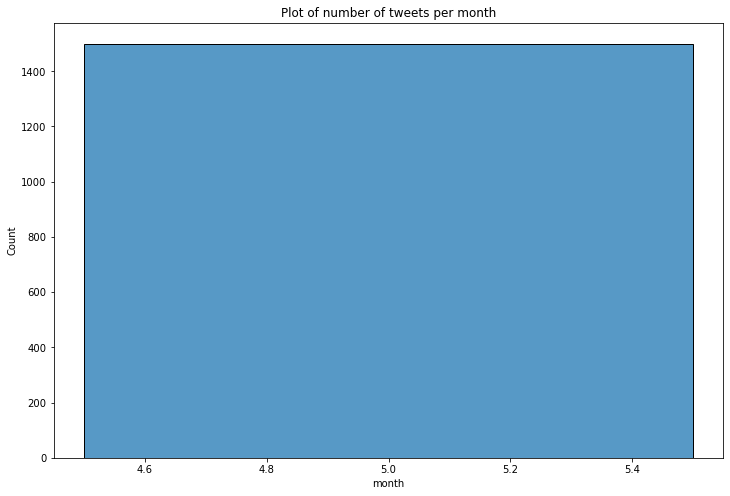

In [14]:
#Lets get a better idea of how tweet volume varies over time
plt.figure(figsize=(12,8))
plt.title('Plot of number of tweets per month')
sns.histplot(data=df, x='month')

<AxesSubplot:title={'center':'Plot of number of tweets per week'}, xlabel='week', ylabel='Count'>

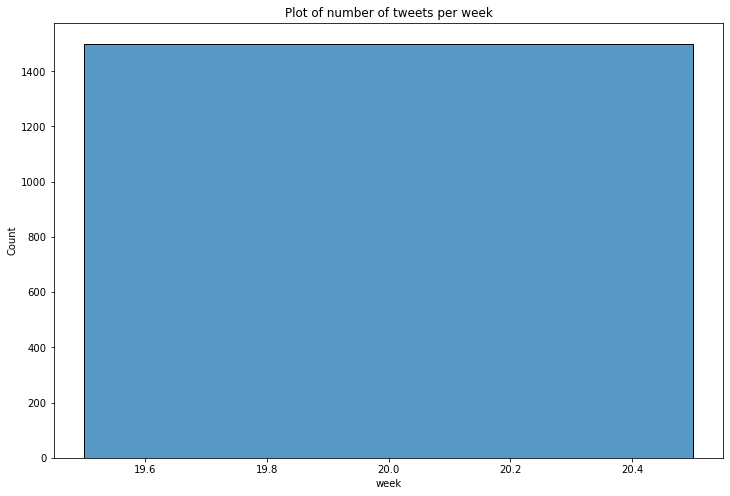

In [15]:
#Lets get a better idea of how tweet volume varies over time
plt.figure(figsize=(12,8))
plt.title('Plot of number of tweets per week')
sns.histplot(data=df, x='week')

In [16]:
df.head()

,time,id,text,user,uid,mention_username,mention_id,mention_realname,url,expanded_url,...,user_listed_count,user_description,user_geo_enabled,user_verified,lang,rtb,mentioncheck,replycheck,month,week
0,2020-05-14 20:20:03+00:00,1261028523772391424,Too many families were already struggling to n...,MurrayCampaign,158470209,NaN,NaN,NaN,https://t.co/bC9V4gBcyo,https://twitter.com/i/web/status/1261028523772...,...,895,Senior U.S. Senator from the great state of Wa...,False,True,en,False,False,False,5,20
1,2020-05-14 20:20:03+00:00,1261028524795838466,@realDonaldTrump @trish_regan China sent the v...,MariKay77,727153519,realDonaldTrump trish_regan,25073877 138182116,Donald J. Trump Trish Regan,https://t.co/Ru0xA0e9Rn,https://twitter.com/i/web/status/1261028524795...,...,6,NaN,False,False,en,True,True,True,5,20
2,2020-05-14 20:20:04+00:00,1261028526020538375,@eileeniorio @LotusOak2 @POTUS You are very na...,GlendaMcRose,1370806812,eileeniorio LotusOak2 POTUS,2932344645 424664120 822215679726100480,EileenIorio LotusOak President Trump,https://t.co/CDlWvD59ro,https://twitter.com/i/web/status/1261028526020...,...,103,"“Just because a man has died for it, does not ...",True,False,en,True,True,False,5,20
3,2020-05-14 20:20:04+00:00,1261028529451479048,@lien2marsha @OttoPardey @RepFredKeller @White...,jazbec_mike,965060983646572544,lien2marsha OttoPardey RepFredKeller WhiteHous...,3882819740 1260226019287601153 113606076142240...,Marsha Lien Otto Pardey Congressman Fred Kelle...,https://t.co/wPGVpx4jji,https://twitter.com/i/web/status/1261028529451...,...,0,NaN,False,False,en,True,True,False,5,20
4,2020-05-14 20:20:06+00:00,1261028537995276294,@ProfFionasm @ChrisMurphyCT last leg delivery ...,thatotherGH,190373454,ProfFionasm ChrisMurphyCT,913093166638731264 150078976,Fiona Scott Morton Chris Murphy,https://t.co/Dc3wyhnyeo,https://twitter.com/i/web/status/1261028537995...,...,0,NaN,False,False,en,True,True,False,5,20


In [17]:
#Now I will create labled data for testing with liwc
import liwc
import spacy

2022-04-12 02:12:54.945134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-12 02:12:54.945166: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
#Setting up our LIWC Analysis
parse, category_names = liwc.load_token_parser('/notebooks/evanc/LIWC2015_English.dic')

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
df['lemmas'] = df['text'].apply(lambda words : [i.lemma_ for i in nlp(words)])

In [22]:
#Counting the words of each catagory
from collections import Counter
df['labels'] = df['lemmas'].apply(lambda lems : dict(sorted(Counter(category for token in lems for category in parse(token)).items()
                                                      ,reverse=True, key=lambda x: x[1])))

In [23]:
#Filtering out all labels except for the ones in 'keys'
keys = ['Power','Anger','Certain','Social','Posemo']
index = -1
for labels in df['labels']:
    index += 1
    df['labels'][index] = {key: labels[key] for key in labels if key in keys}

/tmp/ipykernel_17198/3541753733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][index] = {key: labels[key] for key in labels if key in keys}


In [24]:
#As we can see there are 24 tweets that don't have a category
pd.Series([len(l) for l in df.labels]).value_counts()

2    420
3    403
1    246
4    245
0    117
5     69
dtype: int64

In [25]:
#Filtering out the empty dictionaries
df = df.loc[df['labels'] != {}]

In [26]:
#Creating dummy variables
df['Dummy_Variables'] = pd.Series(df['labels']).apply(lambda x: [key for key in x][0])

In [43]:
dft = df[['text','Dummy_Variables']]

In [44]:
dft.Dummy_Variables.value_counts()

social     1026
power       158
posemo      111
certain      53
anger        35
Name: Dummy_Variables, dtype: int64

# Training BertTweet

In [45]:
#First I will make all the text lowercase
dft['text'] = dft['text'].apply(lambda x: x.lower())
dft['Dummy_Variables'] = dft['Dummy_Variables'].apply(lambda x: x.lower())

/tmp/ipykernel_17198/4108202455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['text'] = dft['text'].apply(lambda x: x.lower())
/tmp/ipykernel_17198/4108202455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Dummy_Variables'] = dft['Dummy_Variables'].apply(lambda x: x.lower())


In [48]:
#Now I will tokenize the data
import tensorflow as tf
from transformers import AutoTokenizer
from transformers import BertweetTokenizer

tokenizer = BertweetTokenizer.from_pretrained("vinai/bertweet-covid19-base-uncased", normalization=True)

dft['tokens'] = dft['text'].apply(lambda x: tf.constant([tokenizer.encode(x)]))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/tmp/ipykernel_17198/1749897733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['tokens'] = dft['text'].apply(lambda x: tf.constant([tokenizer.encode(x)]))


In [57]:
dft.Dummy_Variables.unique()

array(['power', 'social', 'posemo', 'certain', 'anger'], dtype=object)

In [58]:
#mapping values in Dummy_Variables]
categories = {'power':0, 'social':1, 'posemo':2, 'certain':3, 'anger':4}
dft['cats'] = dft['Dummy_Variables'].map(categories)
dft.cats

/tmp/ipykernel_17198/2670153341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['cats'] = dft['Dummy_Variables'].map(categories)


0       0
1       1
2       1
3       1
4       1
       ..
1495    4
1496    0
1497    2
1498    1
1499    1
Name: cats, Length: 1383, dtype: int64

In [50]:
dft.tokens[0]

<tf.Tensor: shape=(1, 48), dtype=int32, numpy=
array([[    0,   111,   239,  3025,   147,   306,  6185,     9, 31810,
            6,  1052,   356,  3816,     7,    13,     6, 24494,    15,
            6,  1456, 10437,    13,  2166,    41,   121,   382,     6,
         3816,  1227,     4,    37,    40,   117,     9,   264,   558,
           16, 10607,     9,   272,  8451, 50659, 43331, 20147,   567,
           48,     4,     2]], dtype=int32)>

In [60]:
#Splitting the Data up
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dft['tokens'], dft['cats'], test_size=0.2, random_state=42)

In [56]:
#Creating the model
from transformers import AutoModel


954     ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
1313    ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
493     ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
404     ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
943     ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
                              ...                        
1190    ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
1230    ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
1406    ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
928     ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
1223    ((tf.Tensor(0, shape=(), dtype=int32), tf.Tens...
Name: tokens, Length: 1106, dtype: object